# Project 2

## Setup

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Load Data

### Get Train/Test

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Normalize Data
Pixel color space takes on values from 0 to 255, thus we can divide by 255 to get our pixels as values from 0 to 1

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Define Helper Functions

In [4]:
def fit_model(model, eps=10):
    history = model.fit(train_images, train_labels, epochs=eps, validation_data=(test_images, test_labels))
    return history

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()
    
def report_accuracy(model):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print(test_acc)

## Devlelop Model
CIFAR images have shape (32,32,3) so that is the basis for our layes
I use "relu" as my activation function for the conolution layers as it performs very well and I did not use it on project 1, so I am looking for an excuse to test it out. For the baseline, I did not want to try anything too crazy, so I setlled on a 3x3 convolution matrix with 3 layers each with 32 nodes due to the shape of our input. I chose to use the adam optimization function due to it being a stochastic gradient descedent optimizer. SGD seemed like it had too many parameters that I would be unsure how to implement.

One reading showed me how to use matplotlib to compare my accuracy across epochs. I love this visualization, so I hope it's alright that I rewrote this code.

In [18]:
def create_baseline_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6204 - accuracy: 0.4075 - val_loss: 1.3776 - val_accuracy: 0.4937
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2805 - accuracy: 0.5406 - val_loss: 1.1978 - val_accuracy: 0.5685
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1529 - accuracy: 0.5919 - val_loss: 1.1732 - val_accuracy: 0.5847
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0739 - accuracy: 0.6227 - val_loss: 1.0773 - val_accuracy: 0.6159
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0192 - accuracy: 0.6423 - val_loss: 1.0316 - val_accuracy: 0.6375
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9686 - accuracy: 0.6601 - val_loss: 0.9636 - val_accuracy: 0.6629
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9293 - accuracy: 0.6736 - val_loss: 0.9913 -

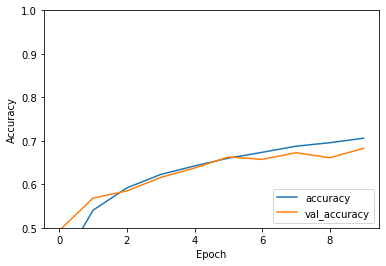

313/313 - 2s - loss: 0.9235 - accuracy: 0.6828 - 2s/epoch - 6ms/step
0.6827999949455261


In [19]:
model = create_baseline_model()
history = fit_model(model) #change epochs later
plot_accuracy(history)
report_accuracy(model)

### Variations on Baseline
This is just a section where I play around with some of the components of the baseline to see what has an impact

In [9]:
def more_layers_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def more_nodes_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def less_nodes_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def adamax_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="adamax", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def rms_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="rmsprop", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def sgd_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="sgd", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 52s 33ms/step - loss: 1.4707 - accuracy: 0.4683 - val_loss: 1.1472 - val_accuracy: 0.5950
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0350 - accuracy: 0.6362 - val_loss: 0.9098 - val_accuracy: 0.6852
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8558 - accuracy: 0.7016 - val_loss: 0.8886 - val_accuracy: 0.6881
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7515 - accuracy: 0.7376 - val_loss: 0.9319 - val_accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6710 - accuracy: 0.7662 - val_loss: 0.7975 - val_accuracy: 0.7334
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6033 - accuracy: 0.7878 - val_loss: 0.7512 - val_accuracy: 0.7431
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5413 - accuracy: 0.8104 - val_loss: 0.8021 - val_accura

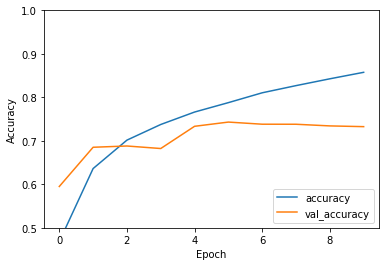

313/313 - 3s - loss: 0.9086 - accuracy: 0.7326 - 3s/epoch - 9ms/step
0.7325999736785889
Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 36s 23ms/step - loss: 1.4473 - accuracy: 0.4738 - val_loss: 1.1670 - val_accuracy: 0.5836
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0416 - accuracy: 0.6321 - val_loss: 0.9832 - val_accuracy: 0.6521
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8702 - accuracy: 0.6975 - val_loss: 0.9158 - val_accuracy: 0.6823
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7593 - accuracy: 0.7348 - val_loss: 0.8624 - val_accuracy: 0.7003
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6706 - accuracy: 0.7660 - val_loss: 0.8143 - val_accuracy: 0.7252
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.5885 - accuracy: 0.7930 - val_loss: 0.8388 - val_accuracy: 0.7269
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5213 - accuracy: 0.8174 - val_loss: 0.8333 - val_accura

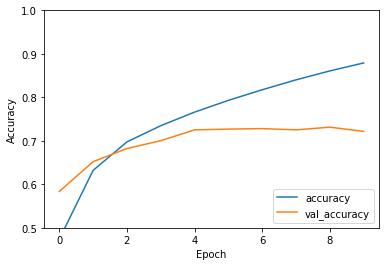

313/313 - 3s - loss: 0.9829 - accuracy: 0.7217 - 3s/epoch - 8ms/step
0.7217000126838684
Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 27s 17ms/step - loss: 1.6006 - accuracy: 0.4155 - val_loss: 1.3576 - val_accuracy: 0.5120
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2572 - accuracy: 0.5519 - val_loss: 1.1655 - val_accuracy: 0.5787
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1136 - accuracy: 0.6059 - val_loss: 1.0888 - val_accuracy: 0.6120
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0286 - accuracy: 0.6380 - val_loss: 1.0746 - val_accuracy: 0.6181
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9627 - accuracy: 0.6624 - val_loss: 1.0197 - val_accuracy: 0.6381
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9183 - accuracy: 0.6781 - val_loss: 1.0624 - val_accuracy: 0.6251
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8735 - accuracy: 0.6922 - val_loss: 1.0030 - val_accura

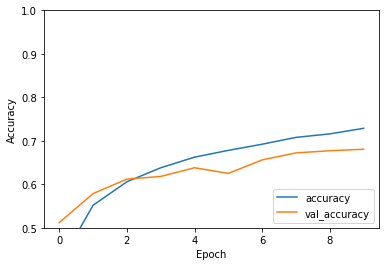

313/313 - 2s - loss: 0.9360 - accuracy: 0.6807 - 2s/epoch - 5ms/step
0.6807000041007996
Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 27s 17ms/step - loss: 1.6397 - accuracy: 0.4076 - val_loss: 1.4177 - val_accuracy: 0.4985
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3213 - accuracy: 0.5314 - val_loss: 1.2320 - val_accuracy: 0.5680
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1807 - accuracy: 0.5868 - val_loss: 1.1838 - val_accuracy: 0.5760
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0790 - accuracy: 0.6223 - val_loss: 1.0952 - val_accuracy: 0.6133
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9992 - accuracy: 0.6526 - val_loss: 1.0120 - val_accuracy: 0.6406
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9347 - accuracy: 0.6756 - val_loss: 0.9758 - val_accuracy: 0.6638
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8754 - accuracy: 0.6952 - val_loss: 0.9456 - val_accura

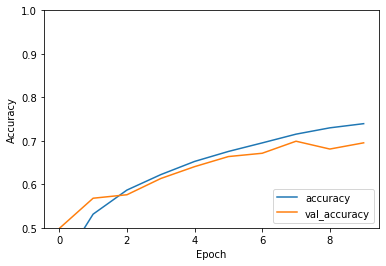

313/313 - 2s - loss: 0.8771 - accuracy: 0.6954 - 2s/epoch - 6ms/step
0.6953999996185303
Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 27s 17ms/step - loss: 1.5381 - accuracy: 0.4420 - val_loss: 1.3608 - val_accuracy: 0.5190
Epoch 2/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.1354 - accuracy: 0.5997 - val_loss: 1.1520 - val_accuracy: 0.5955
Epoch 3/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9625 - accuracy: 0.6628 - val_loss: 0.9708 - val_accuracy: 0.6582
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8539 - accuracy: 0.7022 - val_loss: 0.9328 - val_accuracy: 0.6822
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7716 - accuracy: 0.7319 - val_loss: 0.8900 - val_accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7050 - accuracy: 0.7577 - val_loss: 0.9160 - val_accuracy: 0.7044
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6512 - accuracy: 0.7748 - val_loss: 0.8462 - val_accura

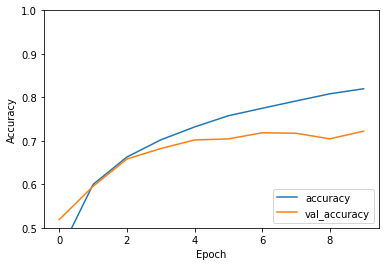

313/313 - 2s - loss: 0.9184 - accuracy: 0.7223 - 2s/epoch - 6ms/step
0.7222999930381775
Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 26s 17ms/step - loss: 2.0549 - accuracy: 0.2455 - val_loss: 1.9392 - val_accuracy: 0.3048
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6999 - accuracy: 0.3884 - val_loss: 1.6108 - val_accuracy: 0.4231
Epoch 3/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4880 - accuracy: 0.4618 - val_loss: 1.4746 - val_accuracy: 0.4688
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3749 - accuracy: 0.5077 - val_loss: 1.4234 - val_accuracy: 0.4896
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.2928 - accuracy: 0.5389 - val_loss: 1.3002 - val_accuracy: 0.5310
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.2164 - accuracy: 0.5698 - val_loss: 1.2832 - val_accuracy: 0.5469
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1502 - accuracy: 0.5973 - val_loss: 1.2312 - val_accura

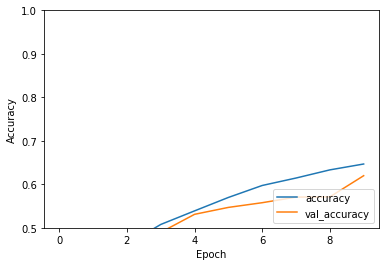

313/313 - 2s - loss: 1.0710 - accuracy: 0.6198 - 2s/epoch - 6ms/step
0.6197999715805054


In [107]:
test = lambda x: eval(x+"()")
functions = ["more_layers_model", "more_nodes_model", "less_nodes_model", "adamax_model", "rms_model", "sgd_model"]
for func in functions:
    model = test(func)
    history = fit_model(model) #change epochs later
    plot_accuracy(history)
    report_accuracy(model)

## Improvement A
Let's try using dropout and a few of the things I learned from above. Adding more layers to the function and switching to adamax seems to be a quick way to add some more accuracy.

In [103]:
def create_dropout_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer="adamax", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 66s 42ms/step - loss: 1.7406 - accuracy: 0.3495 - val_loss: 1.4256 - val_accuracy: 0.4777
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3632 - accuracy: 0.5055 - val_loss: 1.1979 - val_accuracy: 0.5747
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1854 - accuracy: 0.5756 - val_loss: 1.0669 - val_accuracy: 0.6174
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0622 - accuracy: 0.6219 - val_loss: 0.9749 - val_accuracy: 0.6518
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9656 - accuracy: 0.6585 - val_loss: 0.9332 - val_accuracy: 0.6684
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8861 - accuracy: 0.6887 - val_loss: 0.8512 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8132 - accuracy: 0.7160 - val_loss: 0.7998 - val_accura

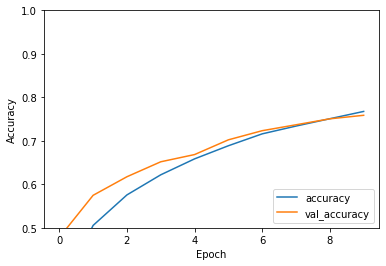

313/313 - 3s - loss: 0.7123 - accuracy: 0.7587 - 3s/epoch - 9ms/step
0.7587000131607056


In [104]:
model = create_dropout_model()
history = fit_model(model) #change epochs later
plot_accuracy(history)
report_accuracy(model)

## Improvement B
Let's try adding batch normalization and a kernel initailizer. Adding these two things seems like a decent way to improve the model's performance without altering too much about the base model. I want to continue using Adamax and the layer sizes I've created thus far. Increasng layer sizes and dropout weights appears to improve accuracy over previous models. 

Some issues arose while I was creating the model with the shapes not aligning properly. From my reading, this is an issue that padding="same" resolves due to it making the spatial dimensions the "same". I start using a kernel initializer here as well because it allows me to normalize my data throughout the process and change the data in a layer's input space to another space before processing. 

In [105]:
def batch_norm_dropout_model():
    model = models.Sequential()    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer="adamax", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

Epoch 1/10


C:\Users\kanin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 127s 81ms/step - loss: 1.9968 - accuracy: 0.3426 - val_loss: 1.4199 - val_accuracy: 0.4886
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4164 - accuracy: 0.4927 - val_loss: 1.2427 - val_accuracy: 0.5573
Epoch 3/10
1563/1563 [==============================] - 132s 84ms/step - loss: 1.2003 - accuracy: 0.5734 - val_loss: 1.0190 - val_accuracy: 0.6383
Epoch 4/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.0451 - accuracy: 0.6343 - val_loss: 0.9073 - val_accuracy: 0.6769
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.9432 - accuracy: 0.6706 - val_loss: 0.7868 - val_accuracy: 0.7293
Epoch 6/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.8667 - accuracy: 0.6983 - val_loss: 0.7447 - val_accuracy: 0.7398
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.8205 - accuracy: 0.7172 - val_loss: 0.7060 - val

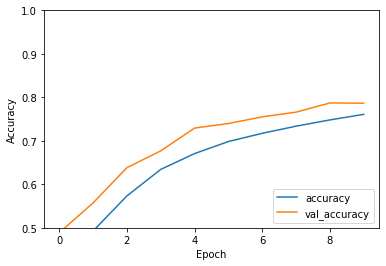

313/313 - 6s - loss: 0.6197 - accuracy: 0.7865 - 6s/epoch - 18ms/step
0.7864999771118164


In [106]:
model = batch_norm_dropout_model()
history = fit_model(model) #change epochs later
plot_accuracy(history)
report_accuracy(model)

## Conclusion

Working with CNNs is already a tricky subject, but somehow, working with a cut-and-paste framework like tensorflow's Sequential model made it more challenging out of the gate. I had to better understand how I wanted the model to look wholistically before really adding layers and toying around. Lots of reading went into the baseline, but luckily that was the hardest part. Cleaning up and improving the accuracy of the CNN was much more linear because I had already familiarlized myself with some of the ways I could improve my model through my readings. I just needed to add a few more calls to the stack so to speak. I'm glad I got a chance to read over kernel initializers, padding, and some of the other optional parameters that go into creating an efficient model, not just a low bones one. 

## References
- https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529?gi=97d218214fb2#:~:text=Examples%20of%20CNN%20in%20computer,i.e%2C%20weights%2C%20biases%20etc.
- https://machinelearningmastery.com/tour-of-optimization-algorithms/
- https://keras.io/api/optimizers/
- https://medium.com/analytics-vidhya/this-blog-post-aims-at-explaining-the-behavior-of-different-algorithms-for-optimizing-gradient-46159a97a8c1
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- https://towardsdatascience.com/basics-of-the-classic-cnn-a3dce1225add
- https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
- https://www.tensorflow.org/tutorials/images/cnn
- https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeUniform